In short PageRank is a “vote”, by all the other pages on the web, about how important a page is. A link to a page counts as a vote of support. If there is no link, it means there is no support for that page. The PageRank of each page depends on the PageRank of the pages pointing to it. But we won’t know what PR those pages have until the pages pointing to them have their PR calculated and so on. 

```
var PR = Array.fill(n)( 1.0 )
val oldPR = Array.fill(n)( 0.0 )
while( max(abs(PR - oldPr)) > tol ) {
  swap(oldPR, PR)
  for( i <- 0 until n if abs(PR[i] - oldPR[i]) > tol ) {
  PR[i] = alpha + (1 - alpha) * inNbrs[i].map(j => oldPR[j] / outDeg[j]).sum
  }
}

`alpha` is the random reset probability (typically 0.15), `inNbrs[i]` is the set of
  neighbors whick link to `i` and `outDeg[j]` is the out degree of vertex `j`
```

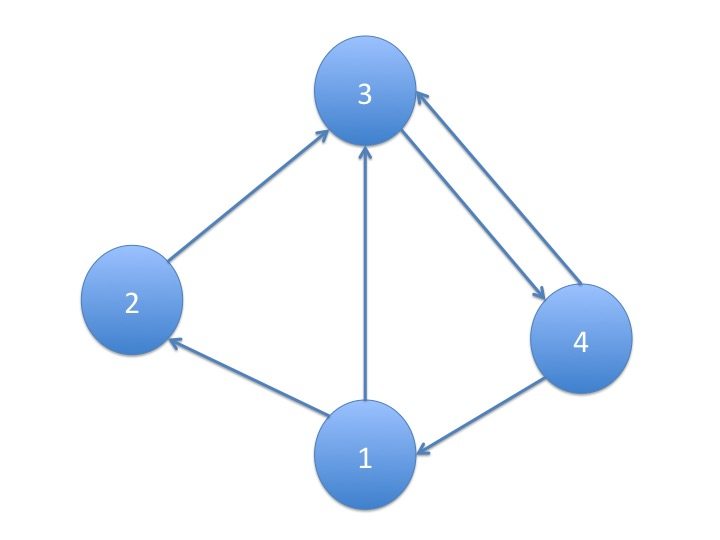

In [2]:
import org.apache.spark._
import org.apache.spark.graphx._
import org.apache.spark.rdd.RDD
import org.apache.spark.graphx.GraphLoader
import org.apache.spark.sql.SparkSession

In [7]:
// Load the edges as a graph
val graph = GraphLoader.edgeListFile(sc, "data/edges.txt")
// Run Daynamic PageRank
val ranks = graph.pageRank(0.0001).vertices
// Join the ranks with the usernames
val users = sc.textFile("data/nodes.txt").map { line =>
  val fields = line.split(",")
  (fields(0).toLong, fields(1))
}
val ranksByUsername = users.join(ranks).map {
  case (id, (username, rank)) => (username, rank)
}
// Print the result
println(ranksByUsername.collect().mkString("\n"))

(user4,1.3703736530462107)
(user2,0.4613793054033705)
(user1,0.732547889234966)
(user3,1.435699152315453)


Pregel API:
Graphs are inherently recursive data structures as properties of vertices depend on properties of their neighbors which in turn depend on properties of their neighbors. As a consequence many important graph algorithms iteratively recompute the properties of each vertex until a fixed-point condition is reached. A range of graph-parallel abstractions have been proposed to express these iterative algorithms.

In [53]:
import scala.reflect.ClassTag

  def run[VD: ClassTag, ED: ClassTag](
      graph: Graph[VD, ED], numIter: Int = 20, resetProb: Double = 0.15)
  {
      
      val outdegreeGraph: Graph[Double, Double] = graph
      // Associate the degree with each vertex
      .outerJoinVertices(graph.outDegrees) { (vid, vdata, deg) => deg.getOrElse(0) }
      // Set the weight on the edges based on the degree
      .mapTriplets( e => 1.0 / e.srcAttr )
      // Set the vertex attributes to the initial pagerank values
      .mapVertices( (id, attr) => 1.0 )
      .cache()

      outdegreeGraph.triplets.map(
         triplet => triplet.srcId + " sends prob=" + triplet.attr + " to " + triplet.dstId
         ).collect.foreach(println(_))  
      
      
    def vertexProgram(id: VertexId, attr: Double, msgSum: Double): Double ={
      resetProb + (1.0 - resetProb) * msgSum
    }
    def sendMessage(edge: EdgeTriplet[Double, Double]) =
      Iterator((edge.dstId, edge.srcAttr * edge.attr))
    def messageCombiner(a: Double, b: Double): Double = a + b
    val initialMessage = 0.0
      
    val pageRankGraph = outdegreeGraph.pregel(initialMessage, numIter, activeDirection = EdgeDirection.Out)(
      vertexProgram, sendMessage, messageCombiner)
      
   pageRankGraph.vertices.collect.foreach{
     case (vId, value) => println(s"${vId} has pagerank= ${value}")
    } 
  }

val graph = GraphLoader.edgeListFile(sc, "data/edges.txt")

val outDegrees: VertexRDD[Int] = graph.outDegrees
outDegrees.collect.foreach(a => println(a))
run(graph, 20, 0.15)




(4,2)
(2,1)
(1,2)
(3,1)
1 sends prob=0.5 to 2
1 sends prob=0.5 to 3
2 sends prob=1.0 to 3
3 sends prob=1.0 to 4
4 sends prob=0.5 to 1
4 sends prob=0.5 to 3
4 has pagerank= 1.3225334566030538
2 has pagerank= 0.44930930552703563
1 has pagerank= 0.7084771144966524
3 has pagerank= 1.3878977176859082


====================================================================================================================

In [2]:
val iter=20
val lines = sc.textFile("data/wiki-Vote.txt") 
val edges = lines.map{ s =>
      val parts = s.split("\\s+")
      (parts(0), parts(1))
    }.distinct().groupByKey().cache()
var ranks = edges.mapValues(v => 1.0)


In [3]:
    for (i <- 1 to iter) {
      //<write the rewuired operations to compute the transition probability and update the ranks for each node>
      //<follow the steps as illustrated in the figure below>
    }

//<sort>
//<display the top 10>


Name: Syntax Error.
Message: 
StackTrace: 

now you need to impelement the iterartive version of pagerank using RDDs directly. The figure below show the steps you need to implement.
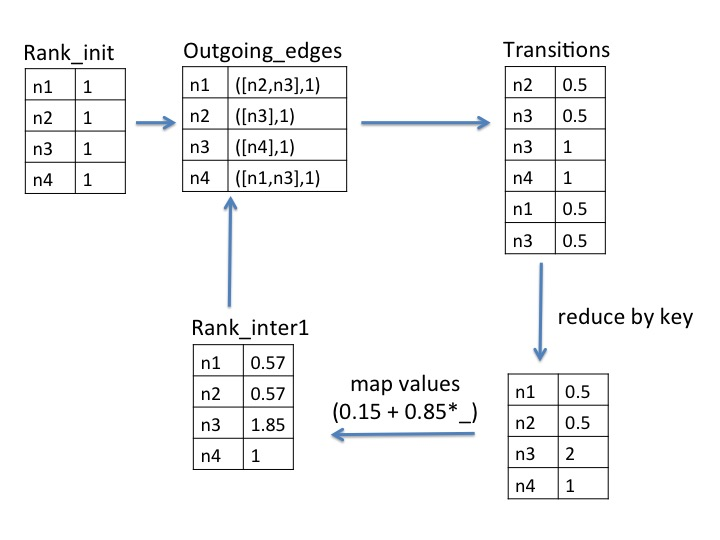